# PART II: Traffic on NC 147

### Data Load

In [1]:
import pandas as pd
from datetime import datetime


dat = pd.read_csv("data/HourlyDataByDirection_raw.csv",
parse_dates=['DATE'],
date_format='%m/%d/%y')

dat['datetime'] = pd.to_datetime(
dat['DATE'].astype(str) + ' ' + dat['TIME'].astype(str)
)
print(dat.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_47944\71216131.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dat['datetime'] = pd.to_datetime(


    LOCAL ID DIRECTION  MONTH  DOW       DATE      TIME  VOLUME  \
0  320000009        EB      1    2 2024-01-01  12:00 AM     730   
1  320000009        EB      1    2 2024-01-01   1:00 AM     664   
2  320000009        EB      1    2 2024-01-01   2:00 AM     487   
3  320000009        EB      1    2 2024-01-01   3:00 AM     380   
4  320000009        EB      1    2 2024-01-01   4:00 AM     330   

             datetime  
0 2024-01-01 00:00:00  
1 2024-01-01 01:00:00  
2 2024-01-01 02:00:00  
3 2024-01-01 03:00:00  
4 2024-01-01 04:00:00  


### 1A. Hourly Data ( 10 pts)

Plot the raw hourly data as a line plot, with time on the x axis and VOLUME on the y axis.
Facet the plot based on DIRECTION. Note that we have data for both sides of the highway (East
Bound and West Bound) - so these need to be plotted as separate lines within each graph (2
pts)

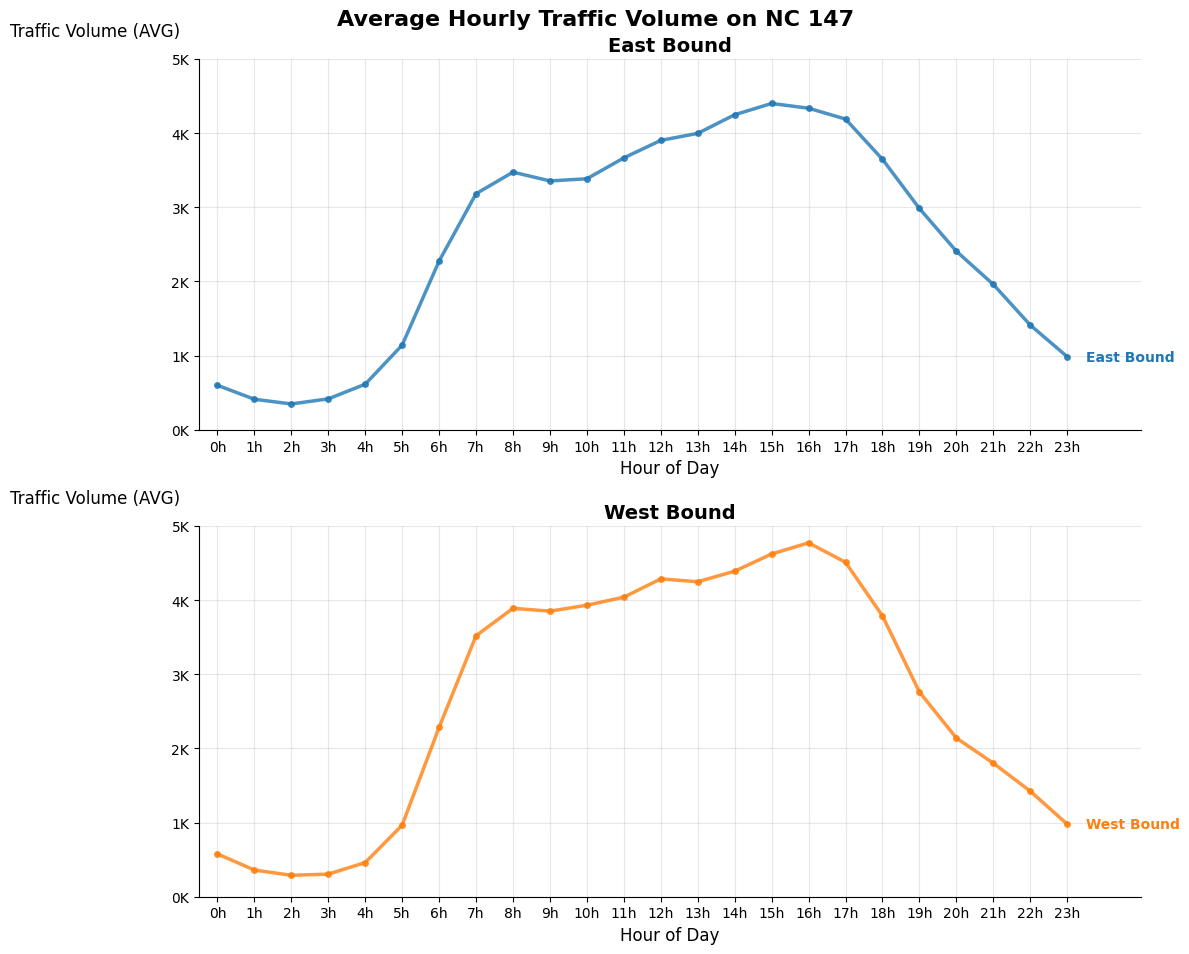

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("colorblind")

dat['hour'] = dat['datetime'].dt.hour
hourly_avg = dat.groupby(['DIRECTION', 'hour'])['VOLUME'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

eb_data = hourly_avg[hourly_avg['DIRECTION'] == 'EB'].sort_values('hour')
wb_data = hourly_avg[hourly_avg['DIRECTION'] == 'WB'].sort_values('hour')

eb_color = '#1f77b4'
wb_color = '#ff7f0e'

axes[0].plot(eb_data['hour'], eb_data['VOLUME'], 
            color=eb_color, linewidth=2.5, marker='o', markersize=4, alpha=0.8)

axes[0].text(eb_data['hour'].iloc[-1] + 0.5, eb_data['VOLUME'].iloc[-1], 'East Bound', 
            fontsize=10, ha='left', va='center', color=eb_color, fontweight='bold')

axes[0].text(-0.02, 1.05, 'Traffic Volume (AVG)', fontsize=12, 
            rotation=0, transform=axes[0].transAxes, ha='right', va='bottom')

axes[0].set_xticks(range(0, 24, 1))
axes[0].set_xticklabels([f'{h}h' for h in range(0, 24, 1)])
axes[0].tick_params(axis='x', rotation=0, labelsize=10)
axes[0].tick_params(axis='y', rotation=0, labelsize=10)

axes[0].set_yticks([0, 1000, 2000, 3000, 4000, 5000])
axes[0].set_yticklabels(['0K', '1K', '2K', '3K', '4K', '5K'])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-0.5, 25)
axes[0].set_ylim(0, 5000)
axes[0].set_title('East Bound', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12)

axes[1].plot(wb_data['hour'], wb_data['VOLUME'], 
            color=wb_color, linewidth=2.5, marker='o', markersize=4, alpha=0.8)

axes[1].text(wb_data['hour'].iloc[-1] + 0.5, wb_data['VOLUME'].iloc[-1], 'West Bound', 
            fontsize=10, ha='left', va='center', color=wb_color, fontweight='bold')

axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].text(-0.02, 1.05, 'Traffic Volume (AVG)', fontsize=12, 
            rotation=0, transform=axes[1].transAxes, ha='right', va='bottom')

axes[1].set_xticks(range(0, 24, 1))
axes[1].set_xticklabels([f'{h}h' for h in range(0, 24, 1)])
axes[1].tick_params(axis='x', rotation=0, labelsize=10)
axes[1].tick_params(axis='y', rotation=0, labelsize=10)

axes[1].set_yticks([0, 1000, 2000, 3000, 4000, 5000])
axes[1].set_yticklabels(['0K', '1K', '2K', '3K', '4K', '5K'])

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-0.5, 25)
axes[1].set_ylim(0, 5000)
axes[1].set_title('West Bound', fontsize=14, fontweight='bold')

fig.suptitle('Average Hourly Traffic Volume on NC 147', 
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 1B. Answer the following (5 pts)
What insights can you get from these initial plots? In what ways does this plot mask patterns
in the data?

**Response** 

I first had a plot with hourly data over the entire time series, day over day for the few months represented in the data. That chart looked solely like a random walk, which had no insights into it. That led me to get avreage hourly traffic for my dataset which unleashed patterns that are substantially more useful. The following patters emerged from my average volume by hour of the day chart:
1) It shows on both East and Westbound trffic is minimized between hours 11pm(23:00) and 5am(05:00). The traffic stays quite high torughout the day both ways, generally peaking around 3-4pm(15:00 - 16:00). 
2) The traffic on both West and Eastbound have a similar range, possessing average hourly volume 400-4500 traffic volume units.
3) On both Directions, traffic tends to increase the most between hours 4:00 - 7:00 while decreasing the most between hours 17:00 - 23:00.

### 2A. Monthly variation in traffic. (12 pts) 

Make four exploratory plots, each with month on the x axis, volume on the y axis. Try making these plots without using AI. Create the following plot types: 

a) A boxplot

b) A violin plot (or half-violin plot)

c) A strip plot (also known as a jitter plot) 

d) A bar plot showing total volume for each month

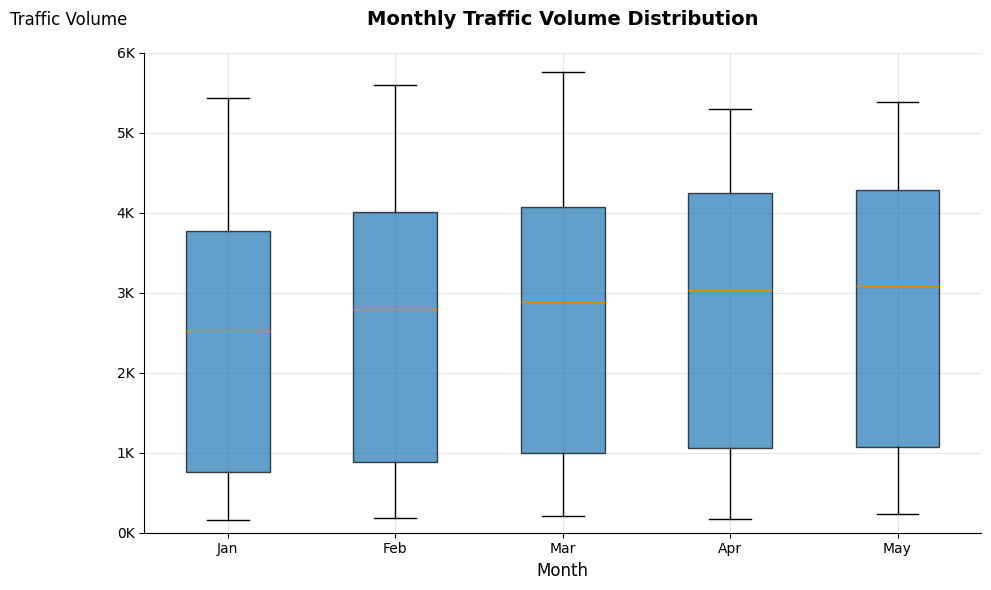

In [3]:
plt.style.use('default')
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

monthly_data = [dat[dat['MONTH'] == month]['VOLUME'] for month in range(1, 6)]
box = ax.boxplot(monthly_data, patch_artist=True)

for patch in box['boxes']:
    patch.set_facecolor('#1f77b4')
    patch.set_alpha(0.7)

ax.set_xlabel('Month', fontsize=12)
ax.text(-0.02, 1.05, 'Traffic Volume', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')

ax.set_xticks(range(1, 6))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'])
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', rotation=0, labelsize=10)

ax.set_ylim(0, 6000)
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax.set_yticklabels(['0K', '1K', '2K', '3K', '4K', '5K', '6K'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3)

ax.set_title('Monthly Traffic Volume Distribution', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

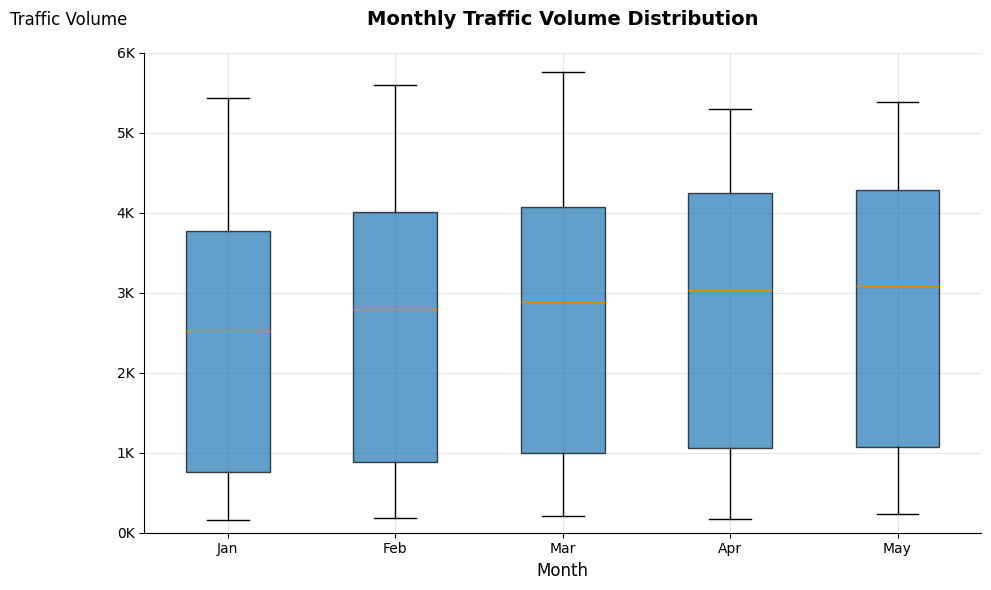

In [4]:
plt.style.use('default')
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

monthly_data = [dat[dat['MONTH'] == month]['VOLUME'] for month in range(1, 6)]
box = ax.boxplot(monthly_data, patch_artist=True)

for patch in box['boxes']:
    patch.set_facecolor('#1f77b4')
    patch.set_alpha(0.7)

ax.set_xlabel('Month', fontsize=12)
ax.text(-0.02, 1.05, 'Traffic Volume', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')

ax.set_xticks(range(1, 6))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'])
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', rotation=0, labelsize=10)

ax.set_ylim(0, 6000)
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax.set_yticklabels(['0K', '1K', '2K', '3K', '4K', '5K', '6K'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3)

ax.set_title('Monthly Traffic Volume Distribution', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

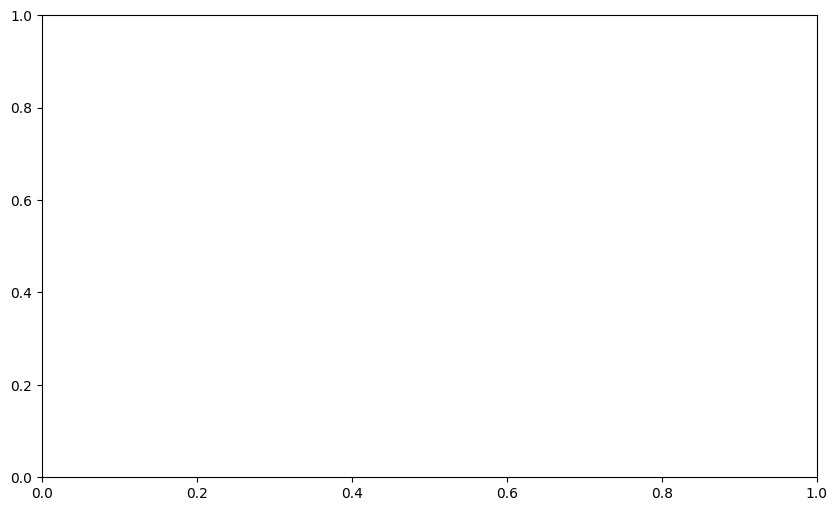

In [5]:
plt.style.use('default')
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

for month in range(1, 6):
    month_data = dat[dat['MONTH'] == month]['VOLUME']
    x_positions = np.random.normal(month, 0.05, len(month_data))
    ax.scatter(x_positions, month_data, alpha=0.4, s=1, color='#1f77b4')

ax.set_xlabel('Month', fontsize=12)
ax.text(-0.02, 1.05, 'Traffic Volume', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')

ax.set_xticks(range(1, 6))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'])
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', rotation=0, labelsize=10)

ax.set_ylim(0, 6000)
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax.set_yticklabels(['0K', '1K', '2K', '3K', '4K', '5K', '6K'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3)

ax.set_title('Monthly Traffic Volume Distribution', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

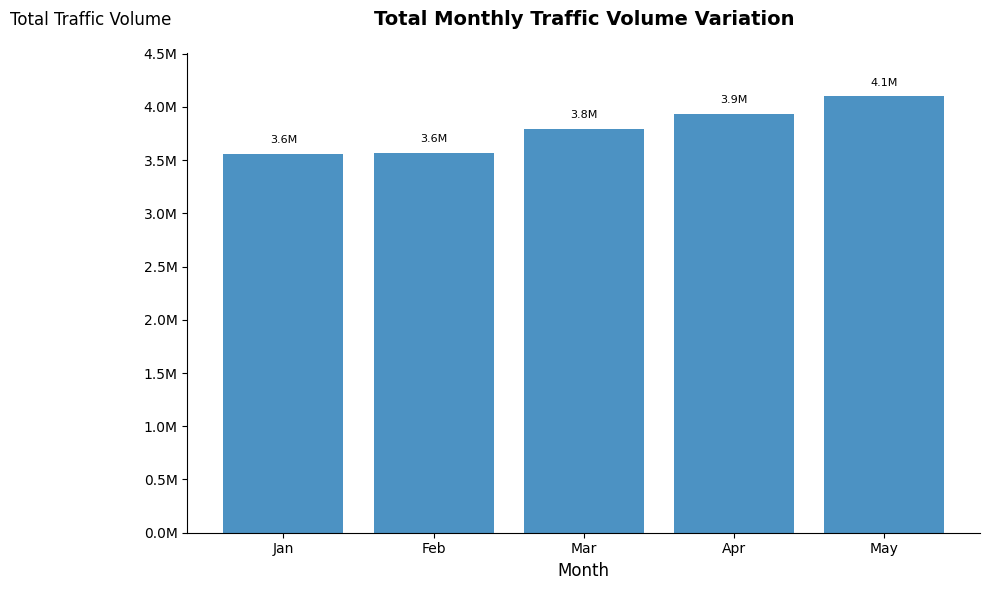

In [ ]:
plt.style.use('default')
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

monthly_totals = dat.groupby('MONTH')['VOLUME'].sum()

def format_volume(volume):
    if volume >= 1000000:
        return f'{volume/1000000:.1f}M'
    elif volume >= 1000:
        return f'{volume/1000:.0f}K'
    else:
        return f'{volume:.0f}'

bars = ax.bar(monthly_totals.index, monthly_totals.values, color='#1f77b4', alpha=0.8)

for i, bar in enumerate(bars):
    height = bar.get_height()
    formatted_height = format_volume(height)
    ax.text(bar.get_x() + bar.get_width()/2., height + max(monthly_totals.values) * 0.02,
            formatted_height, ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Month', fontsize=12)
ax.text(-0.02, 1.05, 'Total Traffic Volume', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')

ax.set_xticks(range(1, 6))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May'])
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', rotation=0, labelsize=10)

max_val = monthly_totals.values.max()
# Y-axis in millions with 0.5M increments
yticks = list(range(0, int(max_val) + 500000, 500000))
ylabels = [f'{tick/1000000:.1f}M' for tick in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_ylim(0, max_val * 1.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Total Monthly Traffic Volume Variation', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 2B. Answer the following: (9 pts) 
What insight or story does each plot reveal that the others do not? Briefly explain how each plot helps you understand the data in a unique way.

**Response**

**Box Plot:** This plot enables a viewer to see the average, top and bottom quartiles as well as the maximum and minimum values for traffic volume. It is useful to understand the relevant statistical measures associated with the distribution of the continuous traffic data.  

**Violin Plot:** This plot helps viewers observe the distribution at which most observations fall under. For example, in January, most rows in the data (observations) have values between 0.5K and 4K units of traffic volume. 

**Jitter Plot:** This plot is useful to see each individual observation and its clusters. Similar to the violin plot, it also helps see the clusters forming around certain traffic volumes. Additionally, it gives insights into each individual observation which often helps spot outliers and cases where traffic volume is extremely high or low in the data. 

**Bar Plot:** This chart is useful for summarizing and aggregating the total volume of the data per month. It doesn't give information around distributions, but it is useful in comparing the total metric month over month.